In [1]:
# import libraries

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma

import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import glob

print ('libraries imported')

libraries imported


In [5]:
#read all diff AMM pattern (SST) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_amm_pattern"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_1pctCO2_diff_amm_pattern_mon.nc',
 'PMIP3_lgm_diff_amm_pattern_mon.nc',
 'PMIP3_midHolocene_diff_amm_pattern_mon.nc',
 'PMIP4_lig127k_diff_amm_pattern_mon.nc',
 'PMIP3_abrupt4xCO2_diff_amm_pattern_mon.nc',
 'PMIP4_piControl_diff_amm_pattern_mon.nc',
 'PMIP3_historical_diff_amm_pattern_mon.nc',
 'PMIP3_1pctCO2_diff_amm_pattern_mon.nc',
 'PMIP4_lgm_diff_amm_pattern_mon.nc',
 'PMIP4_abrupt4xCO2_diff_amm_pattern_mon.nc',
 'PMIP3_lig127k_diff_amm_pattern_mon.nc',
 'PMIP3_piControl_diff_amm_pattern_mon.nc',
 'PMIP4_midHolocene_diff_amm_pattern_mon.nc',
 'PMIP4_historical_diff_amm_pattern_mon.nc']

In [6]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('bwr') #define colour map
    clim=[-0.5,0.5]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.68)
    cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    cb.set_label(label='Change in SST Anomaly ($^\circ$C / $^\circ$C)', size=14)      
    plt.savefig(filename, bbox_inches='tight',pad_inches = 0.02)
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: 

masked_array(
  data=[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [ 3.76848864e-04,  3.56500274e-04,  2.59814342e-04, ...,
          3.98627866e-04,  3.79086420e-04,  3.76848864e-04],
        [-1.46104846e-04, -1.83722372e-04, -2.20936410e-04, ...,
         -6.32083569e-05, -1.10568415e-04, -1.46104846e-04],
        [ 8.06837394e-04,  7.84139306e-04,  7.68937479e-04, ...,
          8.52633887e-04,  8.30056027e-04,  8.06837394e-04]],
  mask=False,
  fill_value=1e+20)

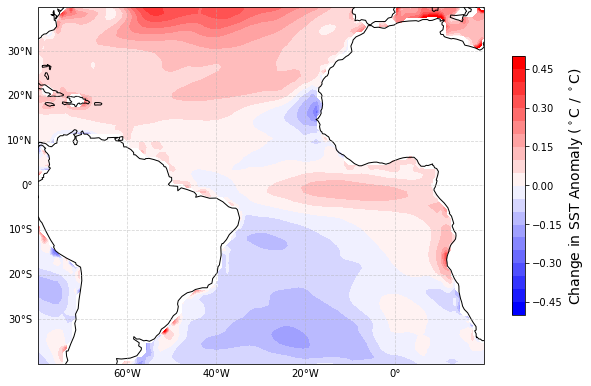

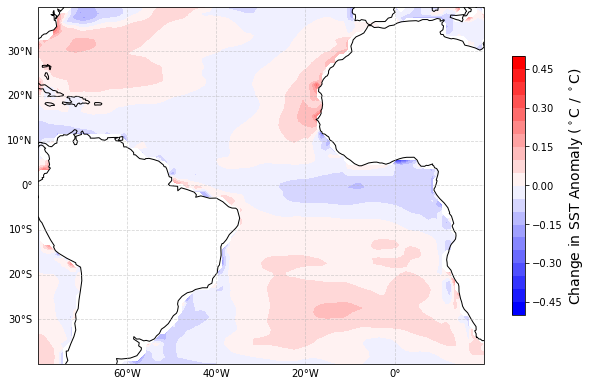

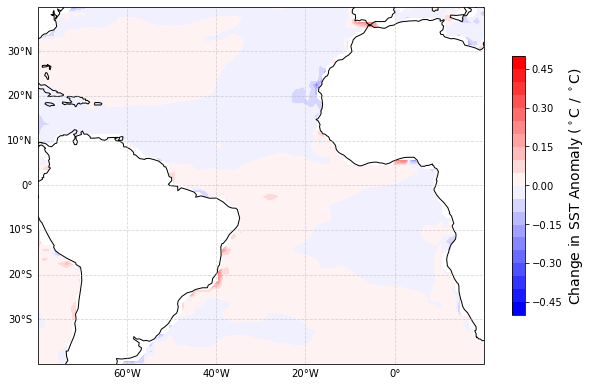

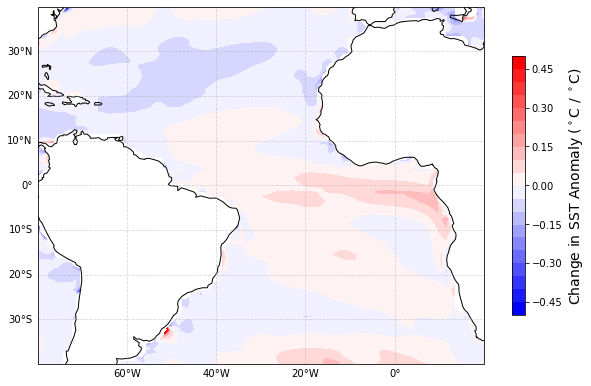

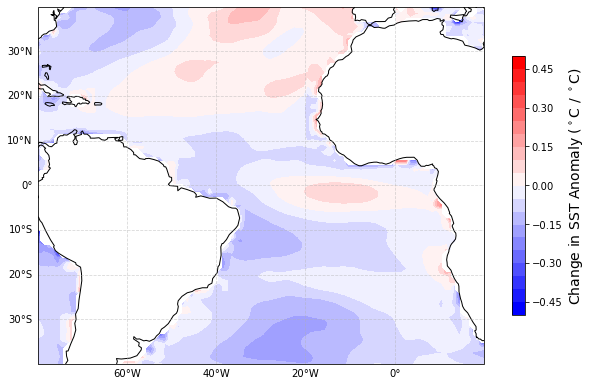

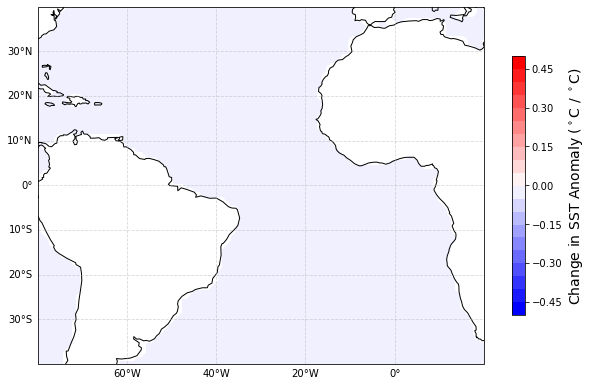

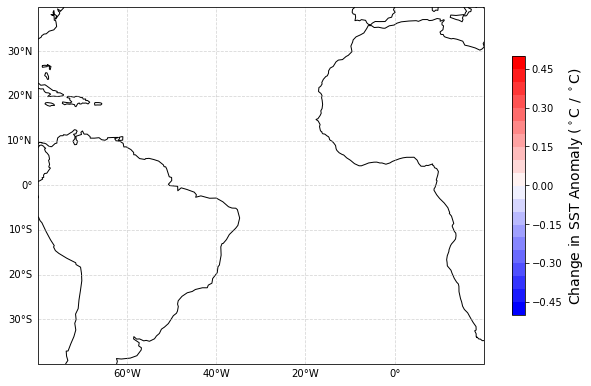

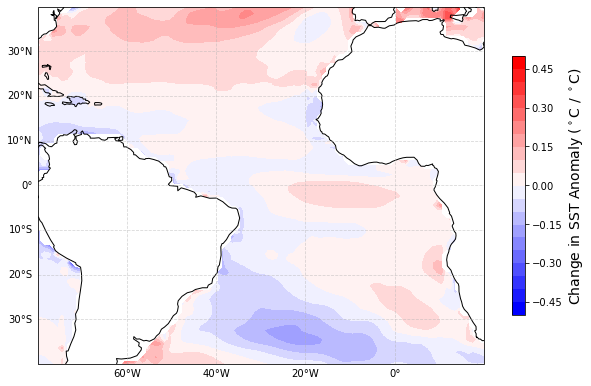

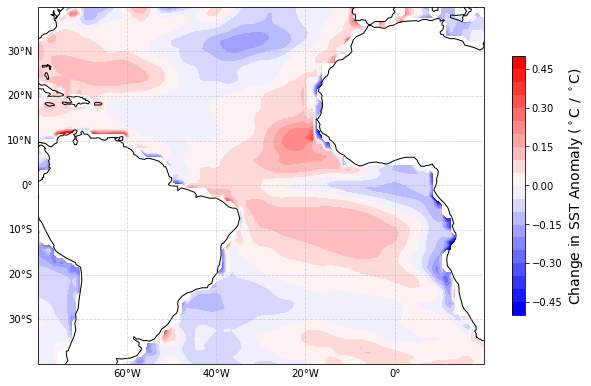

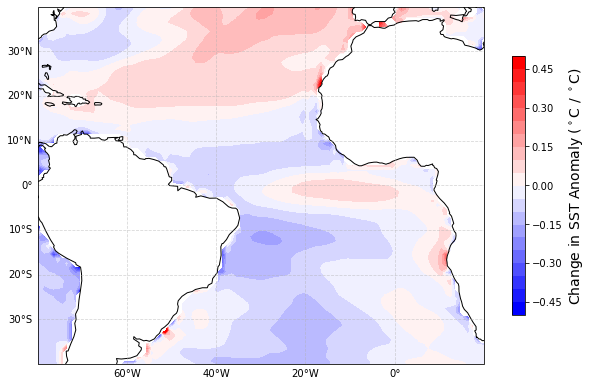

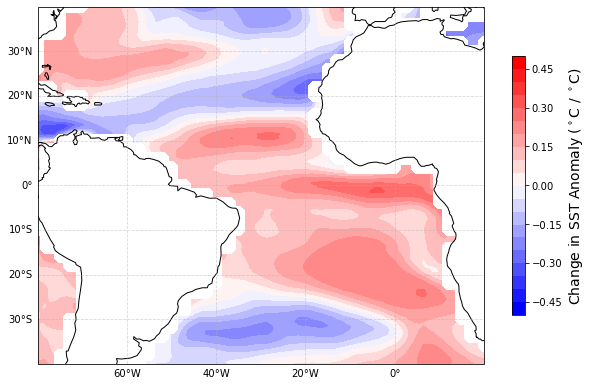

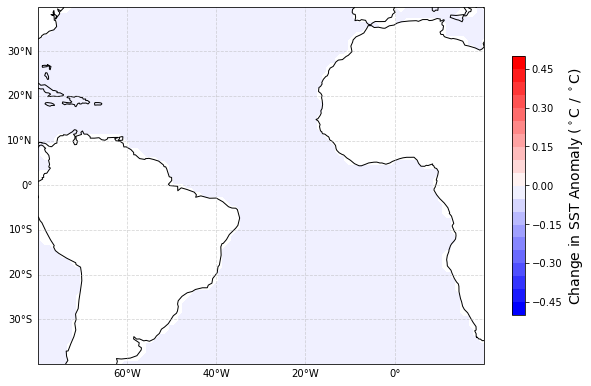

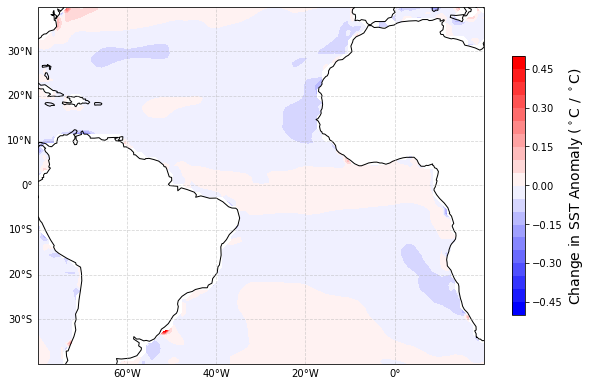

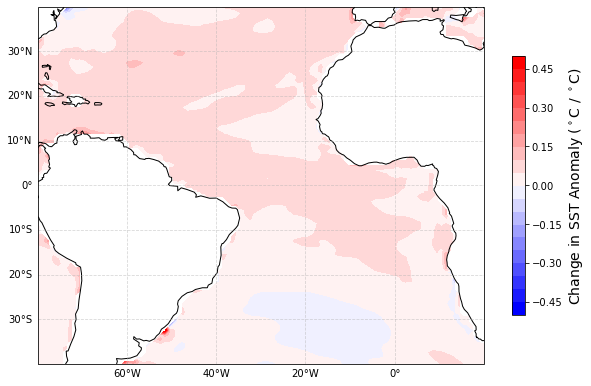

In [7]:
#open datasets
variable_name= 'amm_pattern_mon'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_amm_pattern/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/diff_amm_pattern_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [16]:
#read all diff AMM pr anomaly (precipitation) files 

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_amm_pr"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP3_piControl_diff_amm_pr_regression_mon.nc',
 'PMIP4_midHolocene_diff_amm_pr_regression_mon.nc',
 'PMIP3_midHolocene_diff_amm_pr_regression_mon.nc',
 'PMIP4_lgm_diff_amm_pr_regression_mon.nc',
 'PMIP4_historical_diff_amm_pr_regression_mon.nc',
 'PMIP4_piControl_diff_amm_pr_regression_mon.nc',
 'PMIP4_1pctCO2_diff_amm_pr_regression_mon.nc',
 'PMIP3_1pctCO2_diff_amm_pr_regression_mon.nc',
 'PMIP3_abrupt4xCO2_diff_amm_pr_regression_mon.nc',
 'PMIP4_abrupt4xCO2_diff_amm_pr_regression_mon.nc',
 'PMIP4_lig127k_diff_amm_pr_regression_mon.nc',
 'PMIP3_lig127k_diff_amm_pr_regression_mon.nc',
 'PMIP3_lgm_diff_amm_pr_regression_mon.nc']

In [18]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('BrBG') #define colour map
    clim=[-1,1]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.68)
    cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    cb.set_label(label='Change in Precipitation Regression (mm $day^{-1}$ $^\circ$$C^{-1}$)', size=13)      

    plt.savefig(filename, bbox_inches='tight',pad_inches = 0.02)
    
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: 

masked_array(
  data=[[0.00179314, 0.00182622, 0.00185951, ..., 0.00176789, 0.00177251,
         0.00179314],
        [0.00298539, 0.00309681, 0.00321506, ..., 0.00280151, 0.00288538,
         0.00298539],
        [0.00466883, 0.0049782 , 0.00529084, ..., 0.00414141, 0.00438965,
         0.00466883],
        ...,
        [0.00585568, 0.00644754, 0.00709363, ..., 0.0053777 , 0.0054771 ,
         0.00585568],
        [0.00738767, 0.00801742, 0.00867891, ..., 0.00733591, 0.00715533,
         0.00738767],
        [0.00700068, 0.00764132, 0.00825342, ..., 0.0068484 , 0.00673317,
         0.00700068]],
  mask=False,
  fill_value=1e+20)

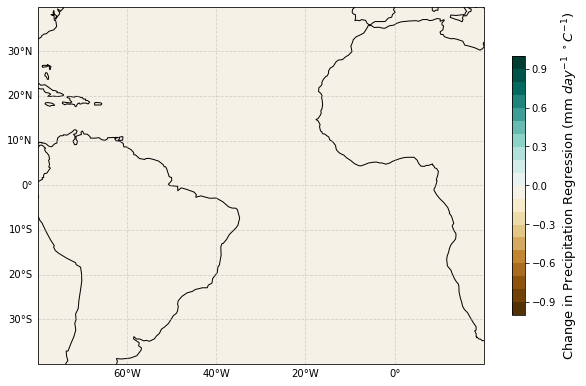

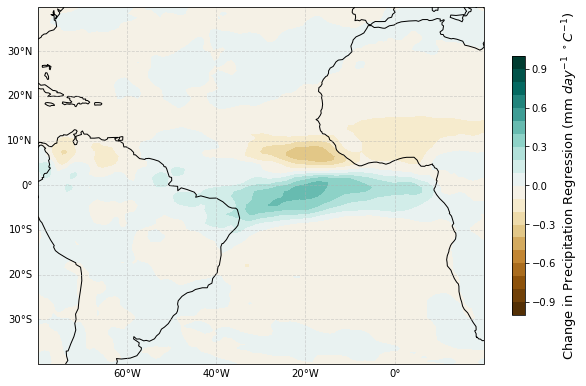

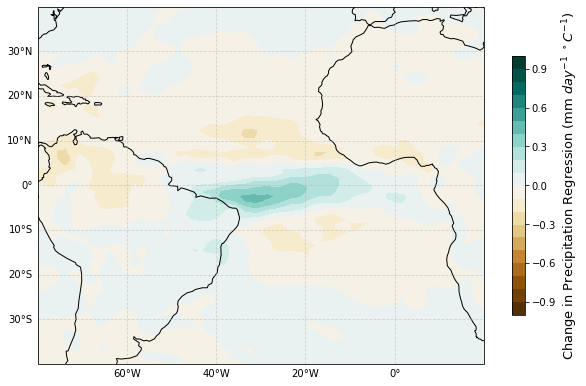

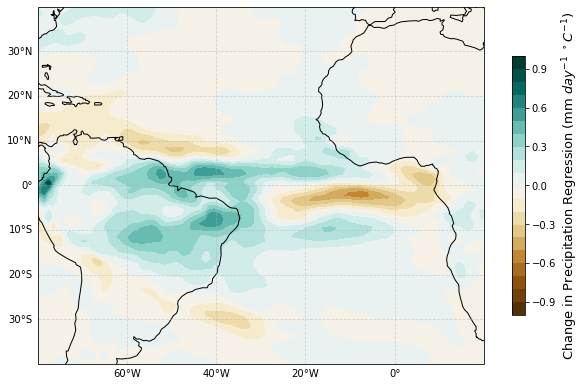

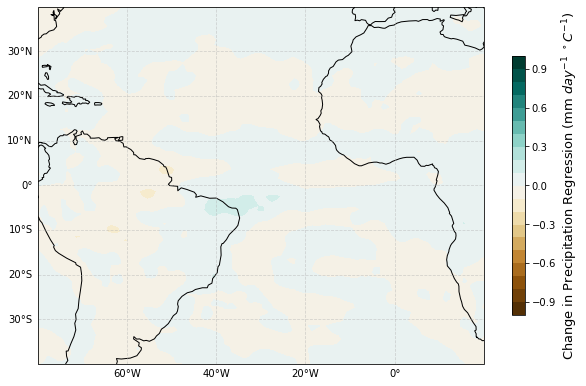

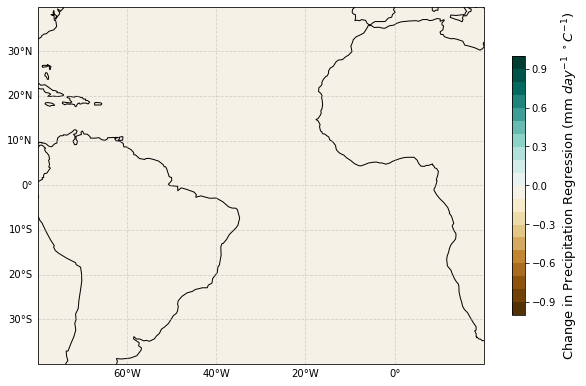

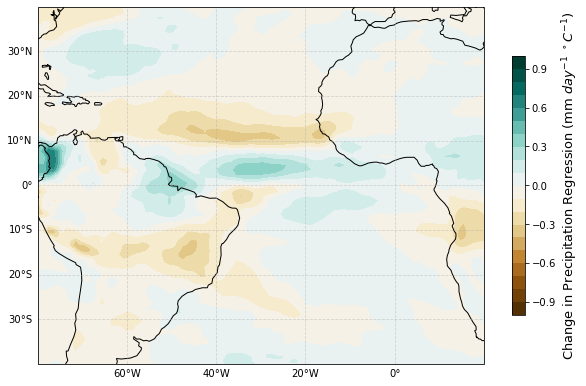

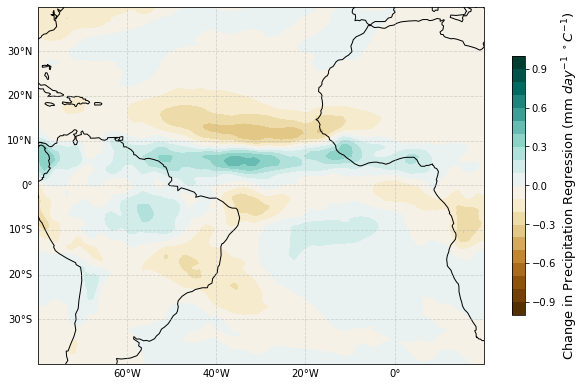

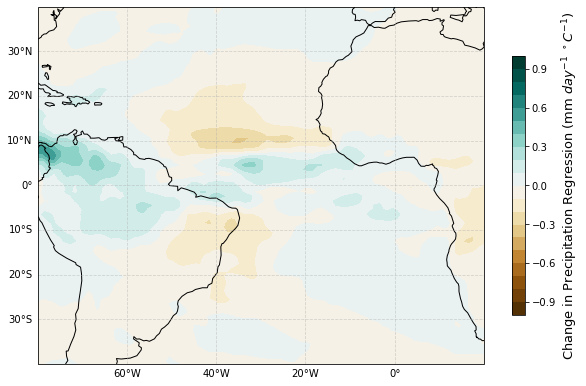

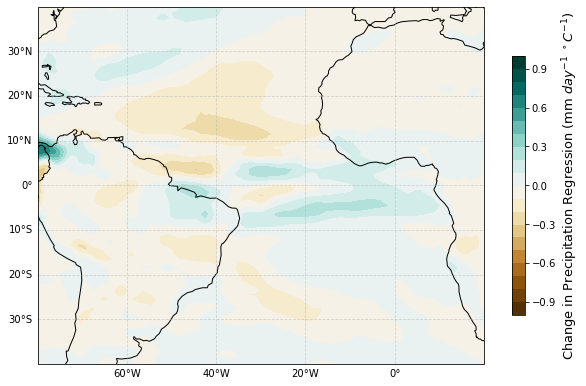

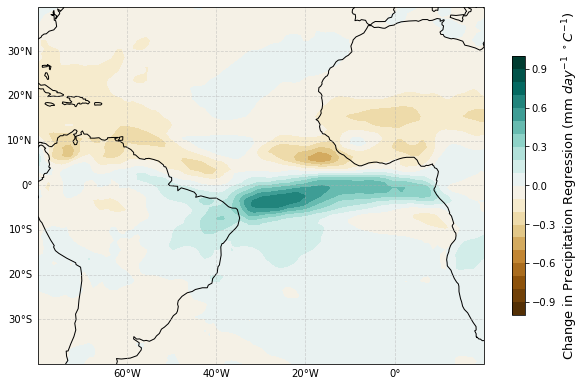

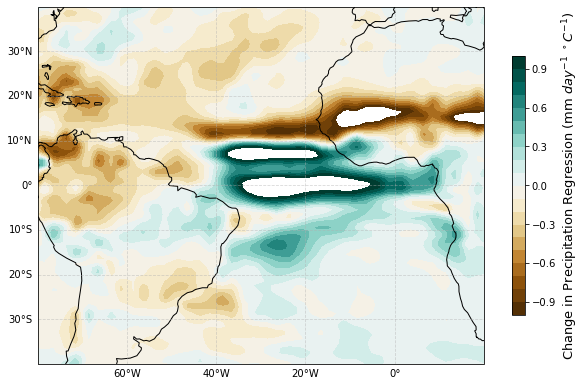

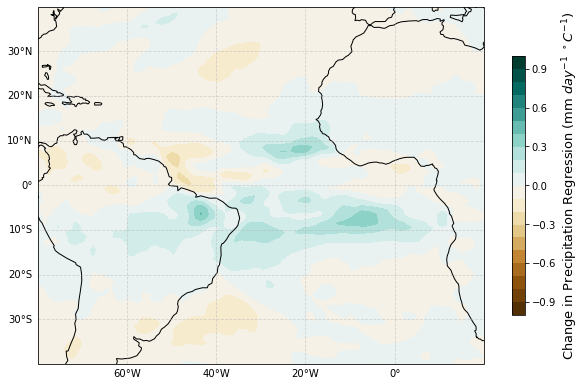

In [19]:
#open datasets and plot maps 
variable_name= 'amm_pr_regression_mon'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_amm_pr/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/diff_amm_pr_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot


In [13]:
#read all AMM diff tas (two metres above surface)files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_amm_tas"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_1pctCO2_diff_amm_tas_regression_mon.nc',
 'PMIP4_lgm_diff_amm_tas_regression_mon.nc',
 'PMIP4_midHolocene_diff_amm_tas_regression_mon.nc',
 'PMIP3_piControl_diff_amm_tas_regression_mon.nc',
 'PMIP4_piControl_diff_amm_tas_regression_mon.nc',
 'PMIP3_lig127k_diff_amm_tas_regression_mon.nc',
 'PMIP3_lgm_diff_amm_tas_regression_mon.nc',
 'PMIP3_abrupt4xCO2_diff_amm_tas_regression_mon.nc',
 'PMIP4_lig127k_diff_amm_tas_regression_mon.nc',
 'PMIP3_midHolocene_diff_amm_tas_regression_mon.nc',
 'PMIP4_historical_diff_amm_tas_regression_mon.nc',
 'PMIP3_1pctCO2_diff_amm_tas_regression_mon.nc',
 'PMIP4_abrupt4xCO2_diff_amm_tas_regression_mon.nc']

In [9]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('bwr') #define colour map
    clim=[-1.4,1.4]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
    plt.colorbar(fig,cax=cax, extend='both', **kw)
    ax.text(0.5, 1.0225, filename, va='bottom', ha='center', 
        rotation='horizontal', rotation_mode='anchor', fontweight='bold', fontsize='14',
        transform=ax.transAxes)
    ax.text(0.5, -0.25, 'AMM TAS Anomaly ($^\circ$C)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)   
    plt.savefig(filename)
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: Use

masked_array(
  data=[[-0.11691425, -0.11695925, -0.11736403, ..., -0.11670316,
         -0.11680679, -0.11691425],
        [-0.12637705, -0.12543051, -0.12576344, ..., -0.12762906,
         -0.12706654, -0.12637705],
        [-0.13107413, -0.12726756, -0.12648787, ..., -0.13374867,
         -0.13312919, -0.13107413],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],
  mask=False,
  fill_value=1e+20)

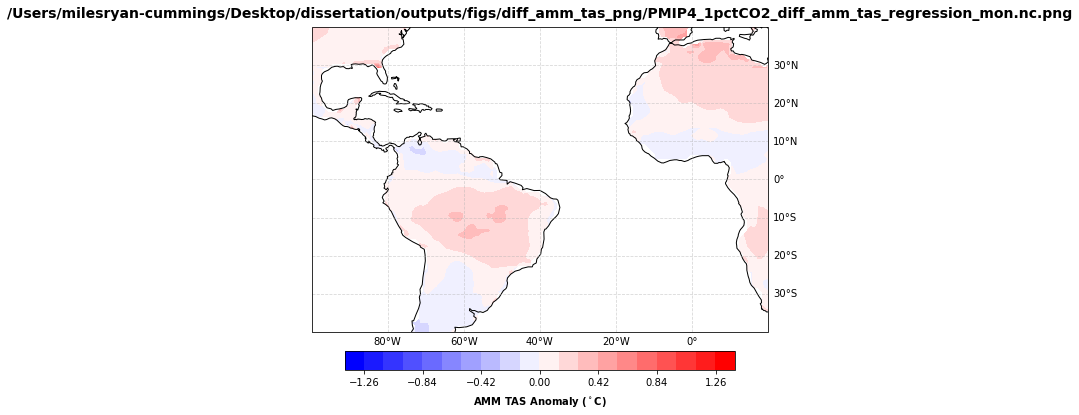

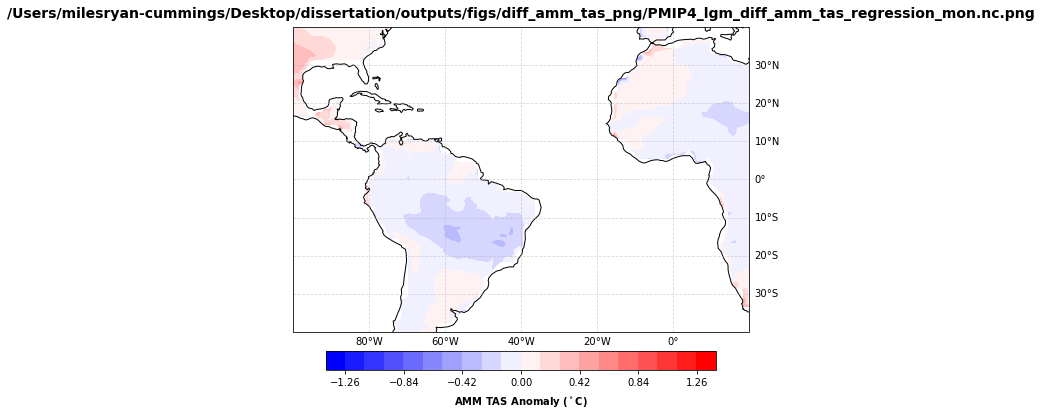

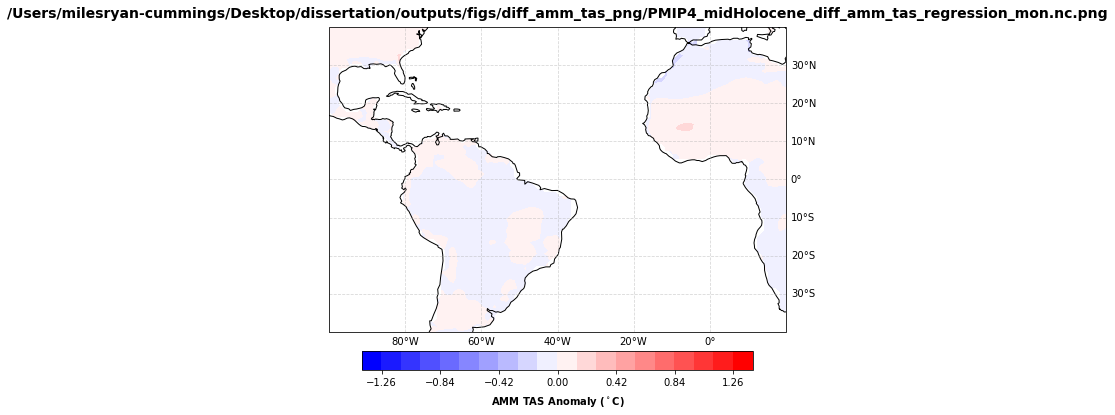

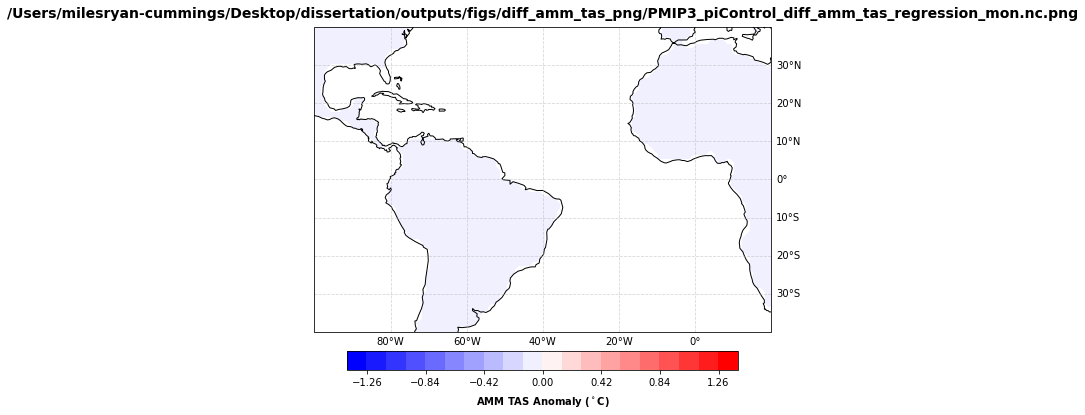

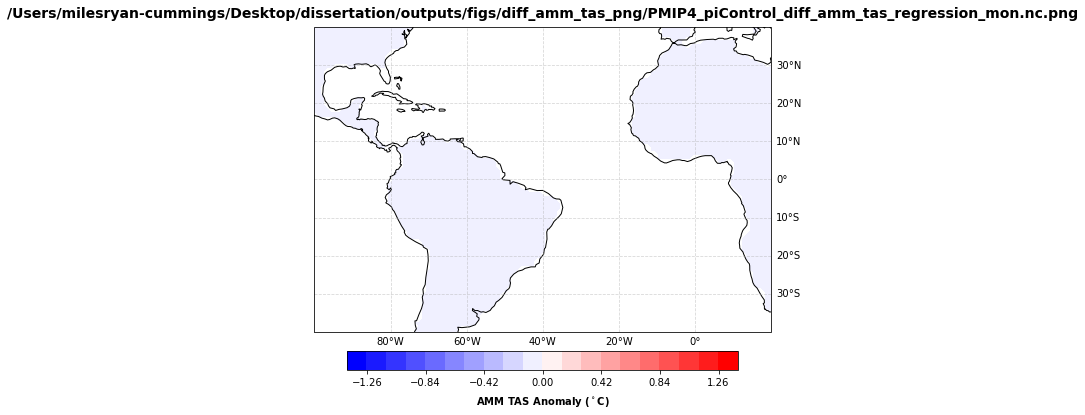

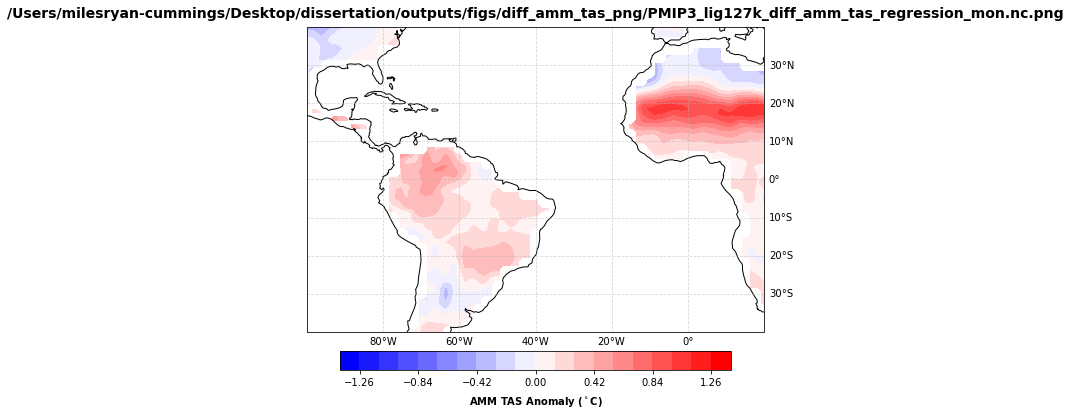

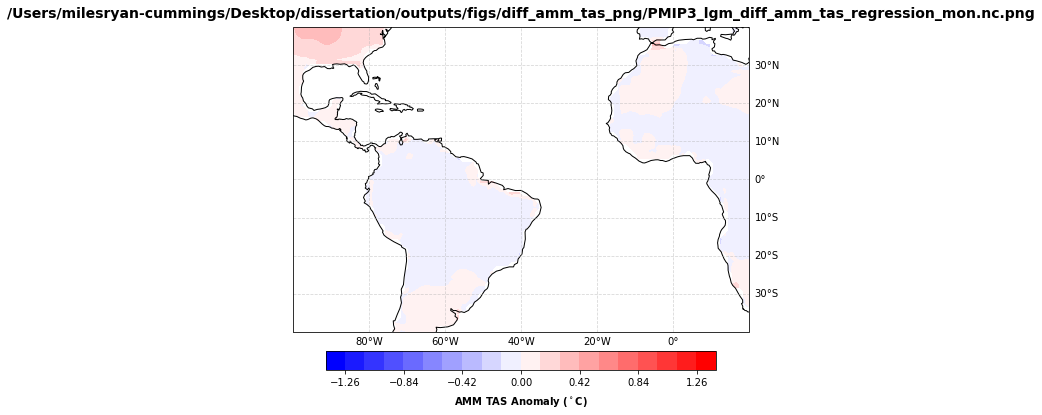

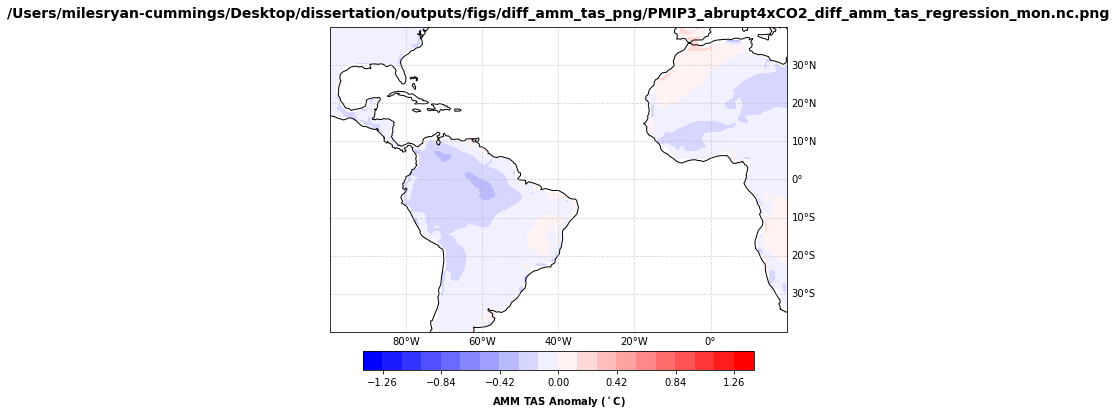

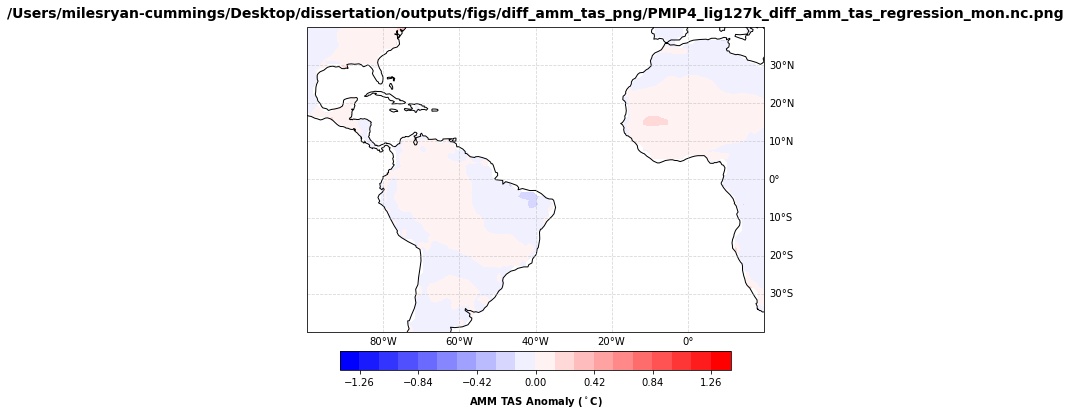

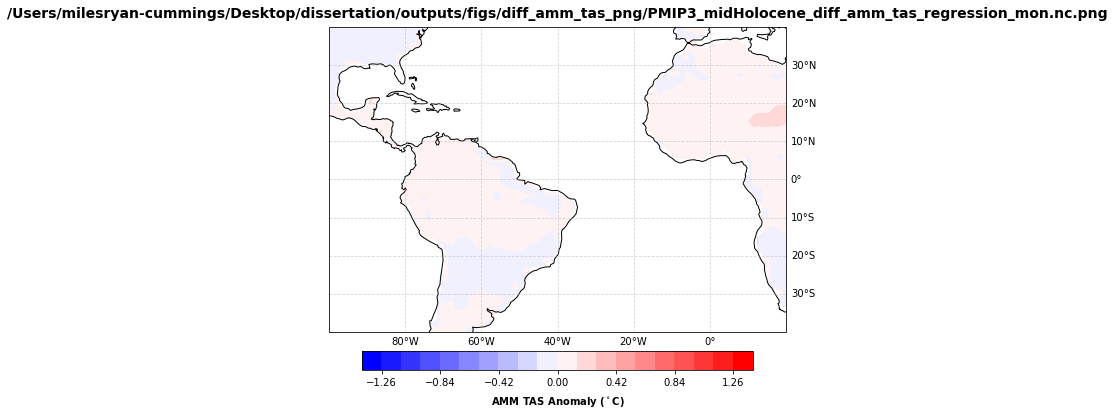

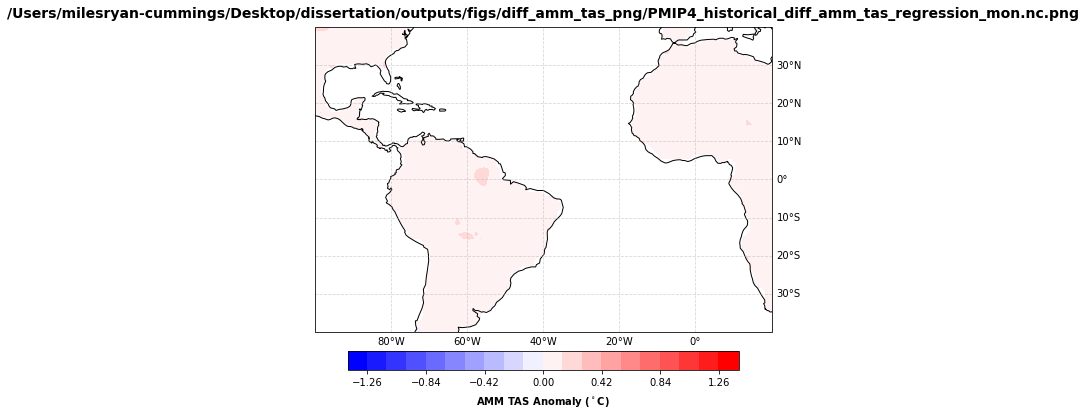

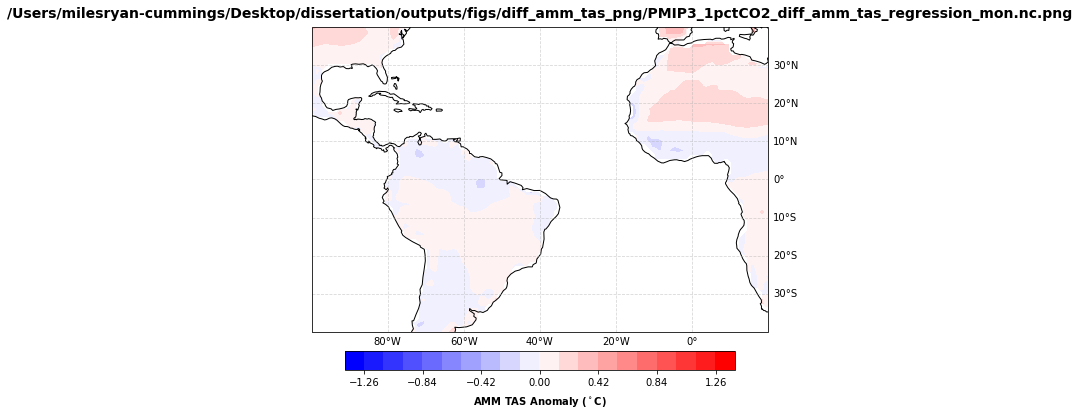

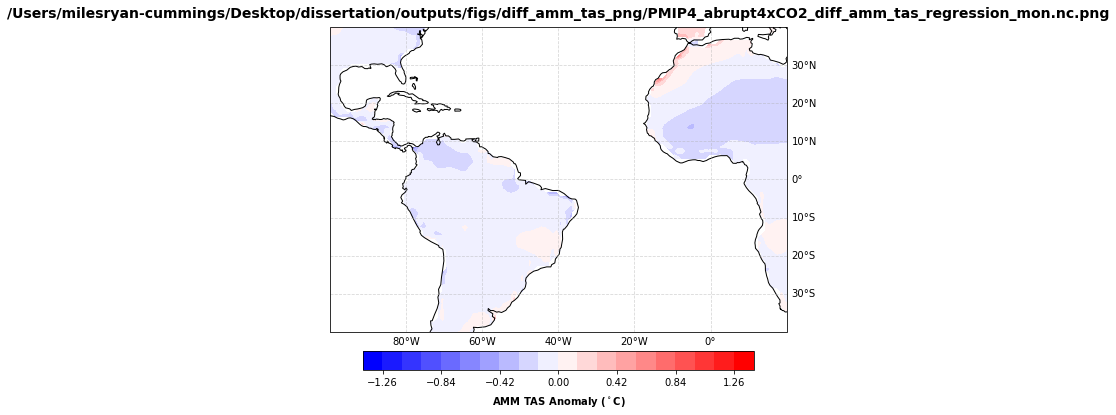

In [10]:
#open datasets
variable_name= 'amm_tas_regression_mon'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_amm_tas/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/diff_amm_tas_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot